# Heart Disease UCI#

For this blog project, I decided to use the the heart disease UCI dataset taken from https://www.kaggle.com/ronitf/heart-disease-uci which is already a reprocessed data from UCI machine learning repository. This dataset have been taken back from 1988 and consisted of patients with admitted heart disease and chest pain symptoms from Cleveland.  

The reason that I used this dataset is because there is a family member of my friend admitted to hospital due to heart disease symptomps and I wanted to tried to test some of the common myths about heart disease to this dataset: 
1. The common gender and ages of having heart disease 
2. The relationship of blood pressure and heart rate in having heart disease 
3. The symptoms of the heart attacks is whether known or not
4. The through heart exam result such as ECG, Fluoroscopy and Thallium 
5. The most important features in predicting either a person has heart disease or not  


This project will follow CRISP-DM(Cross Industry Process for Data Mining) guidelines:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling 
5. Evaluation
6. Deployment 

## 1. Business Understanding ##

In this section, we will ask the business or real-world application questions regarding the data: 
1. Does age and gender of the patients have certain trends in determining whether the patient have heart disease or not? 
2. What is the relationship between blood pressure and heart rate in having heart disease? 
3. Do we know the symptom of the heart attacks such as chest pain caused by heart disease? 
4. What is the trend of the cardiological test such as ECG, Fluoroscopy and Thallium? 
5. Out of 14 predicting features, what are the important features in predicting whether the patient have heart disease or not? (by using machine learning) 

## 2. Data Understanding##
We will try to get more understandings about the data in this part: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, f1_score
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer
from sklearn.base import clone
from time import time
import visuals as vs
import warnings
warnings.filterwarnings('ignore')
np.random.seed(56) #ensure reproducibility

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Features: 
1. **age**: Patient age in years when admitted
2. **sex**: Patient's gender (female=0, male=1)	
3. **cp**: Type of chest pain that patient felt	(typical angina, atypical angina, non-angina, or asymptomatic angina)
4. **trestbps**: Patient's resting blood pressure (mm Hg)
5. **chol**: Patient's cholesterol level (mg/dl)
6. **fbs**: Patient's fasting blood sugar level (< 120 mg/dl or > 120 mg/dl)
7. **restecg**: Patient's resting electrocardiogram results (normal, ST-T wave abnormality, or left ventricular hypertrophy)
8. **thalach**: Patient's maximum heart rate achieved during thalium stress test
9. **exang**: Patient's exercise will induce angina or not (yes or no)
10. **oldpeak**: ST depression (part of electrocardiogram between point S and point T) induced by exercise relative to rest	
11.	**slope**:	Slope of peak exercise ST segment (upsloping, flat, or downsloping)	
12. **ca**:	Number of major heart vessels colored by fluoroscopy 
13.	**thal**: Thalium nuclear test result (normal, fixed defect, or reversible defect)
14.	**target**: Whether the patient have the hearts disease or not (disease=0, healthy=1)

After knowing the data a little bit, we will wrangle all of the data in order to make it ready to be used in analysis.

## 3. Data Preparation ##

The process that we will do in this step are: 
1. Renaming some of the columns and their values so that it become easier to work around with 
2. Determining the impossible values as well as outlier 
3. Analyzing all of the questions that can be answered within the data without modeling

In [4]:
df.columns = ['age', 'gender', 'chest_pain', 'blood_pressure', 'cholesterol', 'blood_sugar', 'restecg', 'max_heart_rate',
       'exang', 'st_depression', 'st_slope', 'major_vessels', 'thallium', 'result']

In [5]:
df.head()

,age,gender,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,max_heart_rate,exang,st_depression,st_slope,major_vessels,thallium,result
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,gender,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,max_heart_rate,exang,st_depression,st_slope,major_vessels,thallium,result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age               0
gender            0
chest_pain        0
blood_pressure    0
cholesterol       0
blood_sugar       0
restecg           0
max_heart_rate    0
exang             0
st_depression     0
st_slope          0
major_vessels     0
thallium          0
result            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age               303 non-null int64
gender            303 non-null int64
chest_pain        303 non-null int64
blood_pressure    303 non-null int64
cholesterol       303 non-null int64
blood_sugar       303 non-null int64
restecg           303 non-null int64
max_heart_rate    303 non-null int64
exang             303 non-null int64
st_depression     303 non-null float64
st_slope          303 non-null int64
major_vessels     303 non-null int64
thallium          303 non-null int64
result            303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
df['gender'].value_counts()

1    207
0     96
Name: gender, dtype: int64

In [10]:
df['chest_pain'].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

In [11]:
df['blood_sugar'].value_counts()

0    258
1     45
Name: blood_sugar, dtype: int64

In [12]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [13]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [14]:
df['st_slope'].value_counts()

2    142
1    140
0     21
Name: st_slope, dtype: int64

In [15]:
df['major_vessels'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: major_vessels, dtype: int64

In [16]:
df['thallium'].value_counts()

2    166
3    117
1     18
0      2
Name: thallium, dtype: int64

In [17]:
df['result'].value_counts()

1    165
0    138
Name: result, dtype: int64

In [18]:
df.loc[df.gender == 0, 'gender'] = 'female'
df.loc[df.gender == 1, 'gender'] = 'male'

df.loc[df.chest_pain == 0, 'chest_pain'] = 'asymptomatic'
df.loc[df.chest_pain == 1, 'chest_pain'] = 'atypical_angina'
df.loc[df.chest_pain == 2, 'chest_pain'] = 'non_anginal_pain'
df.loc[df.chest_pain == 3, 'chest_pain'] = 'typical_angina'

df.loc[df.blood_sugar == 0, 'blood_sugar'] = '<120mg/ml'
df.loc[df.blood_sugar == 1, 'blood_sugar'] = '>=120mg/ml'

df.loc[df.restecg == 0, 'restecg'] = 'left_ventricular_hypertrophy'
df.loc[df.restecg == 1, 'restecg'] = 'normal'
df.loc[df.restecg == 2, 'restecg'] = 'ST-T_wave_abnormality'

df.loc[df.exang == 0, 'exang'] = 'no'
df.loc[df.exang == 1, 'exang'] = 'yes'

df.loc[df.st_slope == 0, 'st_slope'] = 'downsloping'
df.loc[df.st_slope == 1, 'st_slope'] = 'flat'
df.loc[df.st_slope == 2, 'st_slope'] = 'upsloping'

df.loc[df.thallium == 1, 'thallium'] = 'fixed_defect'
df.loc[df.thallium == 2, 'thallium'] = 'normal'
df.loc[df.thallium == 3, 'thallium'] = 'reversible_defect'

In [19]:
df['gender'].value_counts()

male      207
female     96
Name: gender, dtype: int64

In [20]:
df.describe()

,age,blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


There are some impossible values for the major vessels and thallium test results. For the major vessels column, it have value of 4 where it should be Nan in its original datasets. While for the thallium column, it also have a value of 0 which should have been nan in its original dataset. 

In [21]:
indexNames = df[ (df['major_vessels'] == 4) | (df['thallium'] == 0) ].index
df= df.drop(indexNames)

In [22]:
df['thallium'].value_counts()

normal               163
reversible_defect    115
fixed_defect          18
Name: thallium, dtype: int64

In [23]:
indexNames

Int64Index([48, 92, 158, 163, 164, 251, 281], dtype='int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
age               296 non-null int64
gender            296 non-null object
chest_pain        296 non-null object
blood_pressure    296 non-null int64
cholesterol       296 non-null int64
blood_sugar       296 non-null object
restecg           296 non-null object
max_heart_rate    296 non-null int64
exang             296 non-null object
st_depression     296 non-null float64
st_slope          296 non-null object
major_vessels     296 non-null int64
thallium          296 non-null object
result            296 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 34.7+ KB


After dealing with wrong values, we will search for the outlier for the part with continuous value

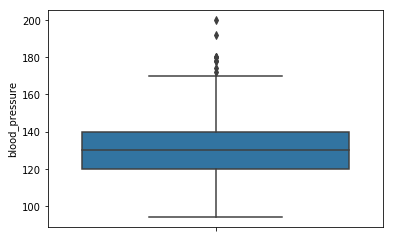

In [25]:
sb.boxplot(data = df, y = 'blood_pressure') 

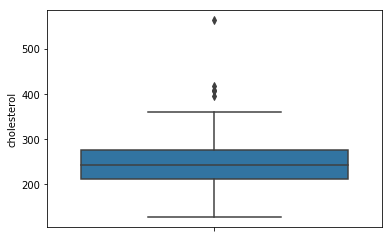

In [26]:
sb.boxplot(data = df, y = 'cholesterol') 

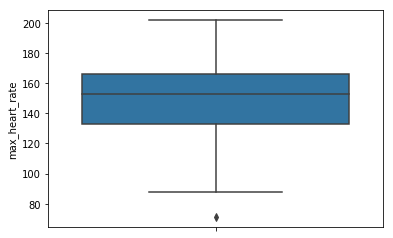

In [27]:
sb.boxplot(data = df, y = 'max_heart_rate') 

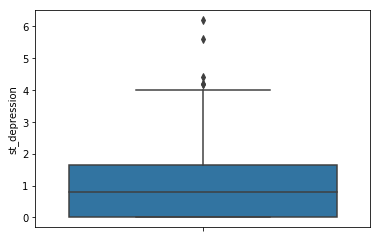

In [28]:
sb.boxplot(data = df, y = 'st_depression') 

We can see that there is some outliers especially for blood_pressure, cholesterol and st_depression which we decide to get rid of by knowing the threshold first 

In [29]:
q1 = df['blood_pressure'].quantile(0.25)
q3 = df['blood_pressure'].quantile(0.75)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
fence_high, fence_low

(170.0, 90.0)

In [30]:
q1 = df['cholesterol'].quantile(0.25)
q3 = df['cholesterol'].quantile(0.75)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
fence_high, fence_low

(371.625, 114.625)

In [31]:
q1 = df['st_depression'].quantile(0.25)
q3 = df['st_depression'].quantile(0.75)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
fence_high, fence_low

(4.125, -2.475)

After knowing the outlier threshold, we will drop all of the value that exceed the high fence 

In [32]:
indexNames2 = df[ (df['blood_pressure'] >= 170) | (df['cholesterol'] >= 371.625) | (df['st_depression'] >= 4.125) ].index
df2= df.drop(indexNames2)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 302
Data columns (total 14 columns):
age               274 non-null int64
gender            274 non-null object
chest_pain        274 non-null object
blood_pressure    274 non-null int64
cholesterol       274 non-null int64
blood_sugar       274 non-null object
restecg           274 non-null object
max_heart_rate    274 non-null int64
exang             274 non-null object
st_depression     274 non-null float64
st_slope          274 non-null object
major_vessels     274 non-null int64
thallium          274 non-null object
result            274 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 32.1+ KB


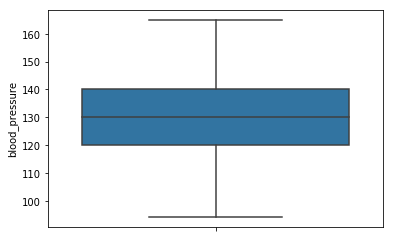

In [34]:
sb.boxplot(data = df2, y = 'blood_pressure') 

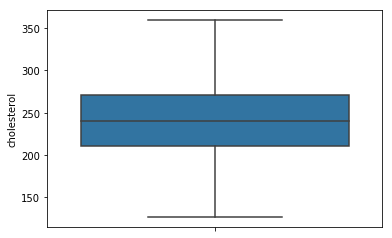

In [35]:
sb.boxplot(data = df2, y = 'cholesterol') 

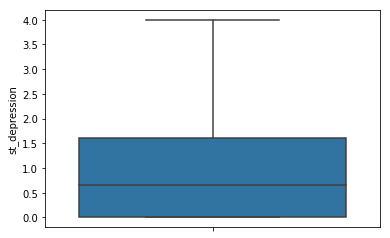

In [36]:
sb.boxplot(data = df2, y = 'st_depression') 

In this section, we will analyze the required features and the methods in answering the questions 

### 1. Does age and gender of the patients have certain trends in determining whether the patient have heart disease or not?### 

The needed features for this question are age, gender and result columns. 

In [37]:
age_distribution = df2.groupby(["age", "result"]).size().reset_index()

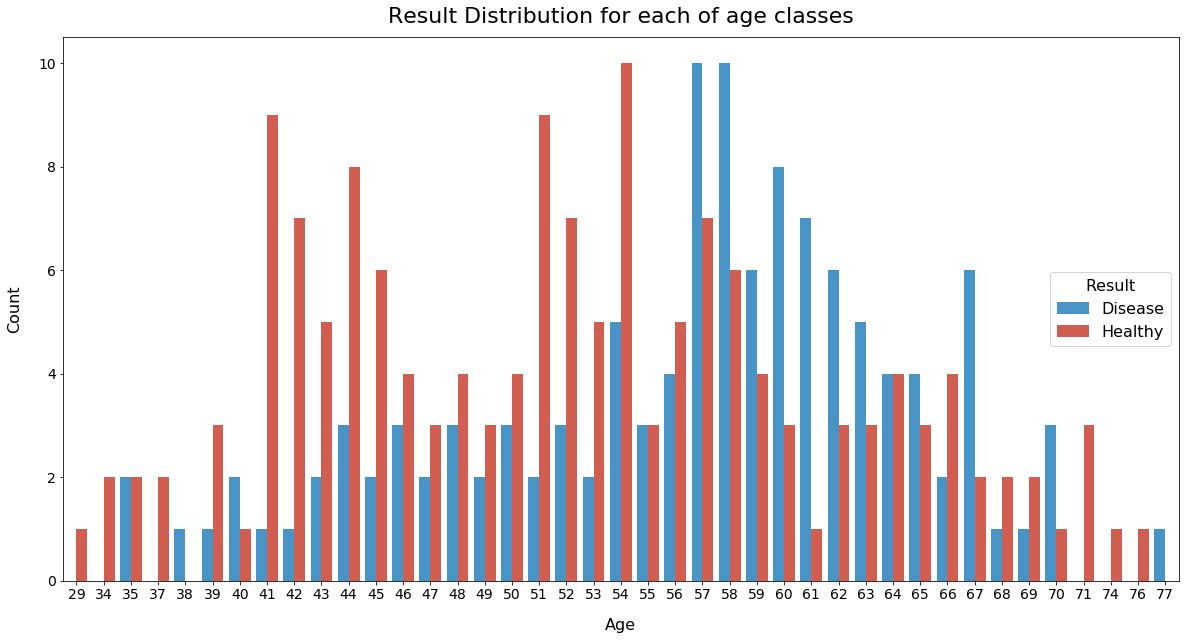

In [38]:
plt.figure(figsize=(20,10))
my_palette = {0:'#3498db', 1:'#e74c3c'}
ax = sb.barplot(x='age', y=0, hue='result', palette=my_palette, data=age_distribution)
plt.title('Result Distribution for each of age classes', fontsize=22, y=1.015)
plt.xlabel('Age', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
leg = ax.legend(loc='center right', bbox_to_anchor=(1, 0.5), prop={'size':16})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

We can see that as the patient get older, the possibility of having heart disease is higher especially at the age of 60s 

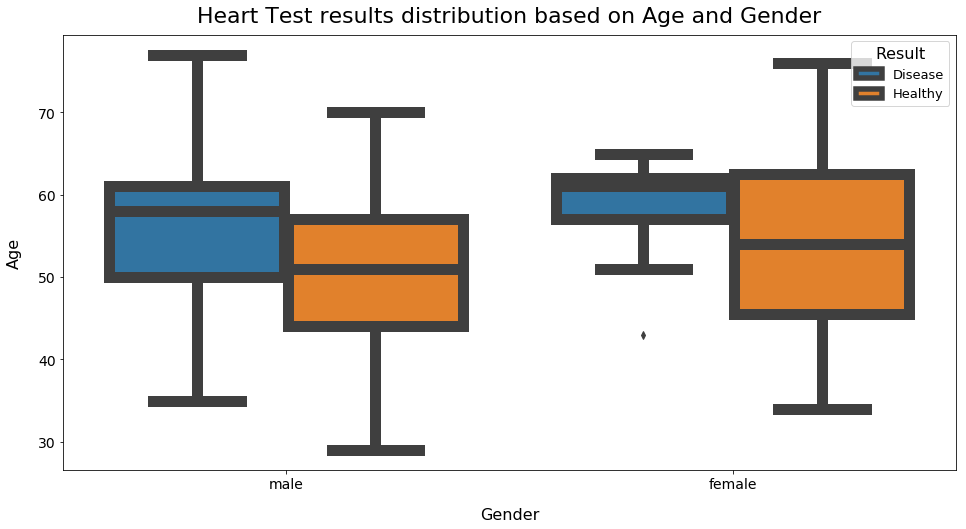

In [70]:
plt.figure(figsize=(16,8))
ax = sb.boxplot(x='gender', y='age', hue='result', linewidth=11, data= df2)
plt.title('Heart Test results distribution based on Age and Gender', fontsize=22, y=1.015)
plt.xlabel('Gender', fontsize=16, labelpad=16)
plt.ylabel('Age', fontsize=16, labelpad=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
leg = ax.legend(loc='upper right', prop={'size':13})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

As we can see that the male have wider distribution (30s-80s) among ages for the one that has heart disease compared to the female age distribution (50s-65s)

### 2. What is the relationship between blood pressure and heart rate in having heart disease?### 

The features in this question will be blood pressure and max heart rate as well as result column 

In [40]:
df_d = df2[df2['result'] == 0]

In [41]:
df_nd = df2[df2['result'] == 1]

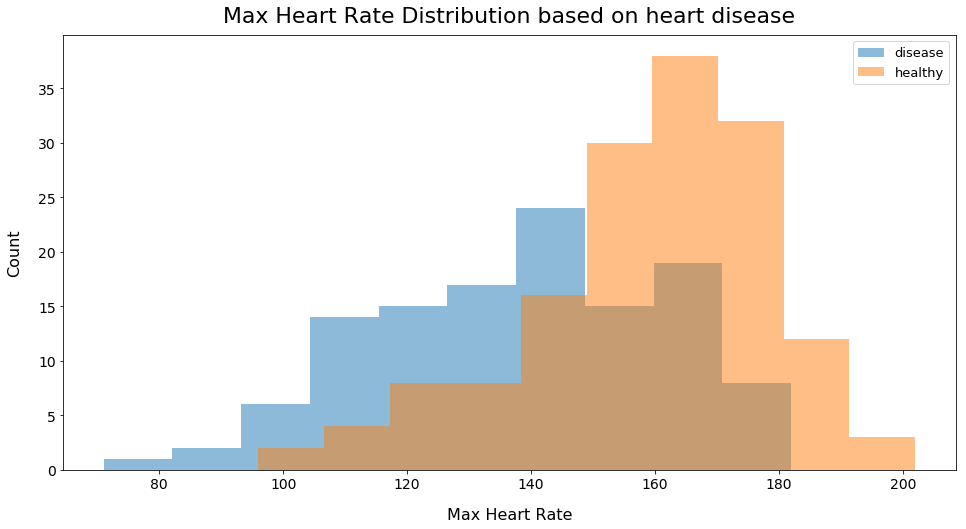

In [42]:
plt.figure(figsize=(16,8))
plt.hist(df_d['max_heart_rate'], alpha=0.5, label='disease')
plt.hist(df_nd['max_heart_rate'], alpha=0.5, label='healthy')
plt.title('Max Heart Rate Distribution based on heart disease', fontsize=22, y=1.015)
plt.xlabel('Max Heart Rate', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(loc='upper right', prop={'size':13})
plt.show()

We can see that the one with healthy hearts have stronger maximum heart rate. 

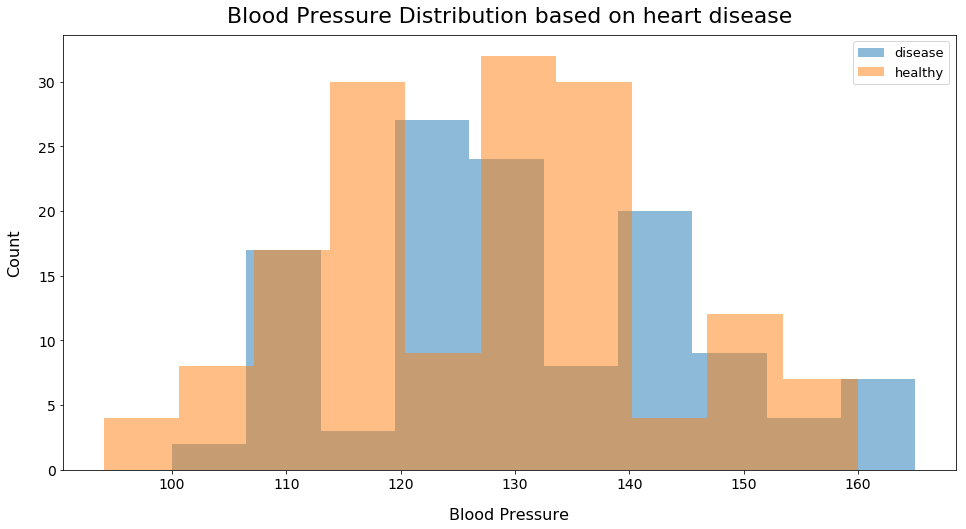

In [43]:
plt.figure(figsize=(16,8))
plt.hist(df_d['blood_pressure'], alpha=0.5, label='disease')
plt.hist(df_nd['blood_pressure'], alpha=0.5, label='healthy')
plt.title('Blood Pressure Distribution based on heart disease', fontsize=22, y=1.015)
plt.xlabel('Blood Pressure', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(loc='upper right', prop={'size':13})
plt.show()

there are no special trait that can be distinguished between the healthy and sick patients in their blood pressure section; however, we can see that healthy patient have lower blood pressure compared to patient with heart disease. 

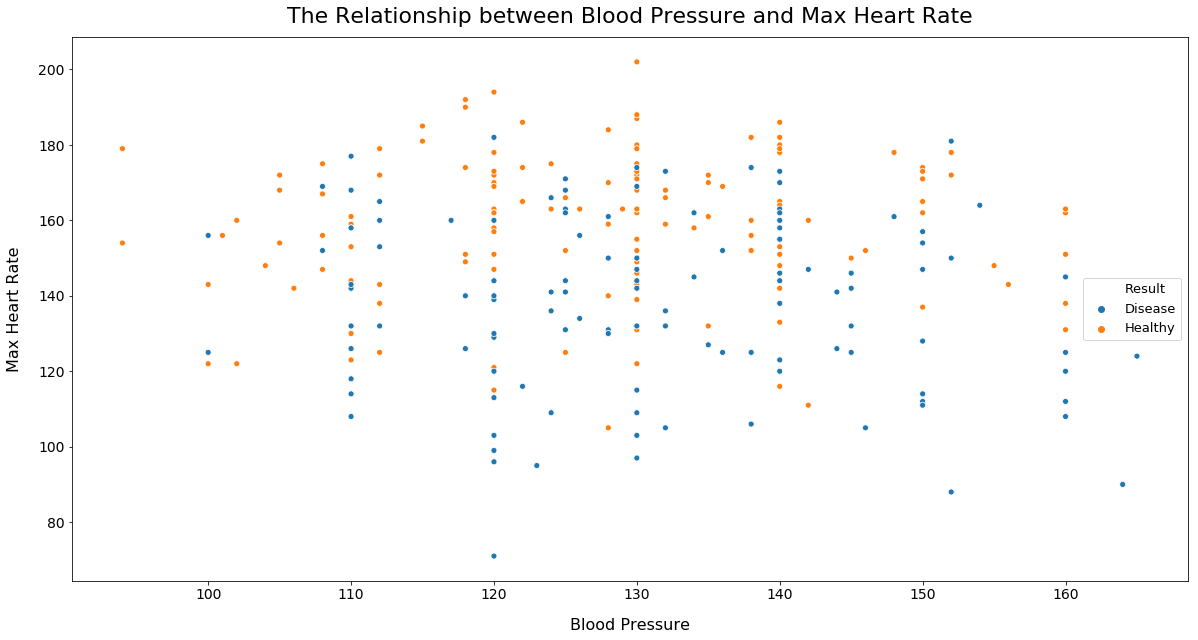

In [72]:
plt.figure(figsize=(20,10))
ax = sb.scatterplot(x='blood_pressure', y='max_heart_rate', hue='result', data=df2)
plt.title('The Relationship between Blood Pressure and Max Heart Rate', fontsize=22, y=1.015)
plt.xlabel('Blood Pressure', fontsize=16, labelpad=16)
plt.ylabel('Max Heart Rate', fontsize=16, labelpad=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
leg = ax.legend(loc='center right', bbox_to_anchor=(1, 0.5), prop={'size':13})
new_labels = ["Result", "Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

As the graph indicated, the lower half of the max heart rate is filled with sick patient which have lower max heart rate. we can also see that the blood pressure of healthy patient is also lower compared to sick patient which is indicated by the left side of this graph. 

### 3. Do we know the symptom of the heart attacks such as chest pain caused by heart disease?### 

For this question, we will check remaining features that might tell us more about the symptoms of chest pain

In [46]:
chest_distribution = df2.groupby(["chest_pain", "result"]).size().reset_index()

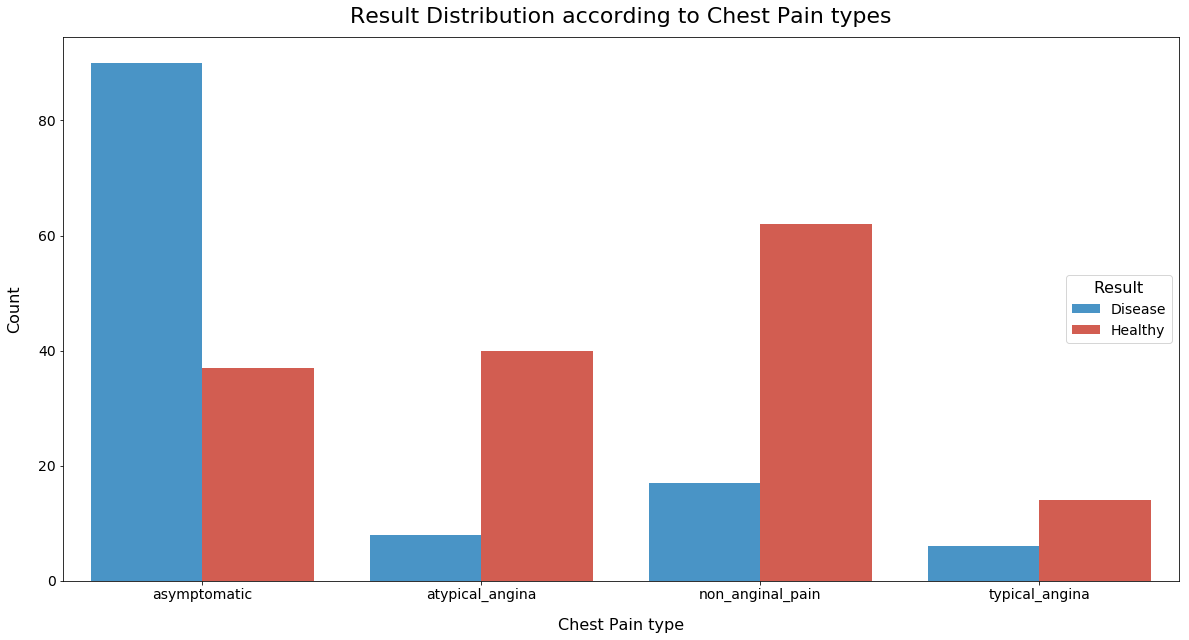

In [47]:
plt.figure(figsize=(20,10))
my_palette = {0:'#3498db', 1:'#e74c3c'}
ax = sb.barplot(x='chest_pain', y=0, hue='result', palette=my_palette, data=chest_distribution)
plt.title('Result Distribution according to Chest Pain types', fontsize=22, y=1.015)
plt.xlabel('Chest Pain type', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
leg = ax.legend(loc='center right', bbox_to_anchor=(1, 0.5),  prop={'size':14})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

Angina is a type of chest pain which is usually caused by the reduction of amount of blood that is pumped to heart, thus, making the heart work harder. There are four categories of angina: 
1. [asymptomatic](https://www.health.harvard.edu/heart-health/angina-and-its-silent-cousin): The type of angina that has no symptoms which can only be detected by electrocardiogram 
2. [atypical angina](https://www.timeofcare.com/typical-vs-atypical-chest-pain/): the type of angina which is categorized as probable angina (usually only consist two out of three classifications: Chest pain or discomfort symptoms, caused by exhaustion or emotional stress, can be relieved by rest or nitroglycerin) 
3. [non_anginal_pain](https://www.timeofcare.com/typical-vs-atypical-chest-pain/): the type of angina which is categorized as non-ischemic chest discomfort which only meets one or none of the classifications above
4. [typical_angina](https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/): the type of angina is categorized as definite angina which meets all three requirements above

So we can see that the asymptomatic angina is the one with the highest count among all other angina. According to [this](https://www.health.harvard.edu/heart-health/angina-and-its-silent-cousin) source, asymptomatic also one of the most dangerous type of angina since there is no symptoms. 

In [52]:
exang_distribution = df2.groupby(["exang", "result"]).size().reset_index()

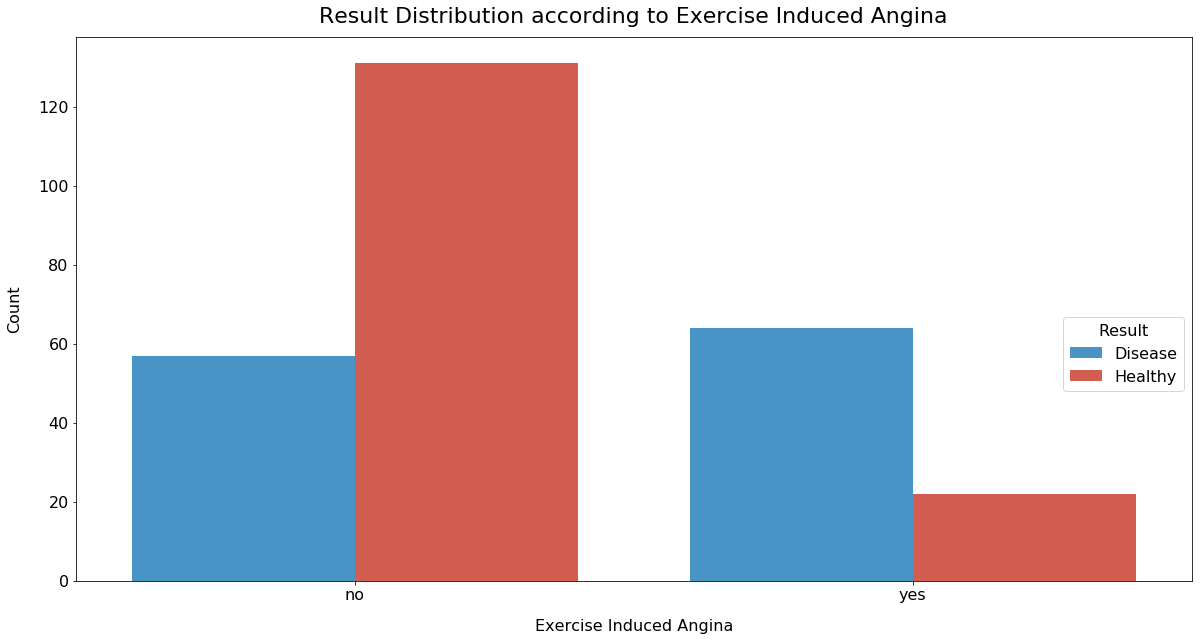

In [53]:
plt.figure(figsize=(20,10))
my_palette = {0:'#3498db', 1:'#e74c3c'}
ax = sb.barplot(x='exang', y=0, hue='result', palette=my_palette, data=exang_distribution)
plt.title('Result Distribution according to Exercise Induced Angina', fontsize=22, y=1.015)
plt.xlabel('Exercise Induced Angina', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
leg = ax.legend(loc='left', bbox_to_anchor=(1, 0.5), prop={'size':16})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

Exercise induced angina means that when the patient exercise, they have the possibility in triggering angina which of course is in line with the logic that those with heart disease have higher possibility in triggering agina when exercise. 

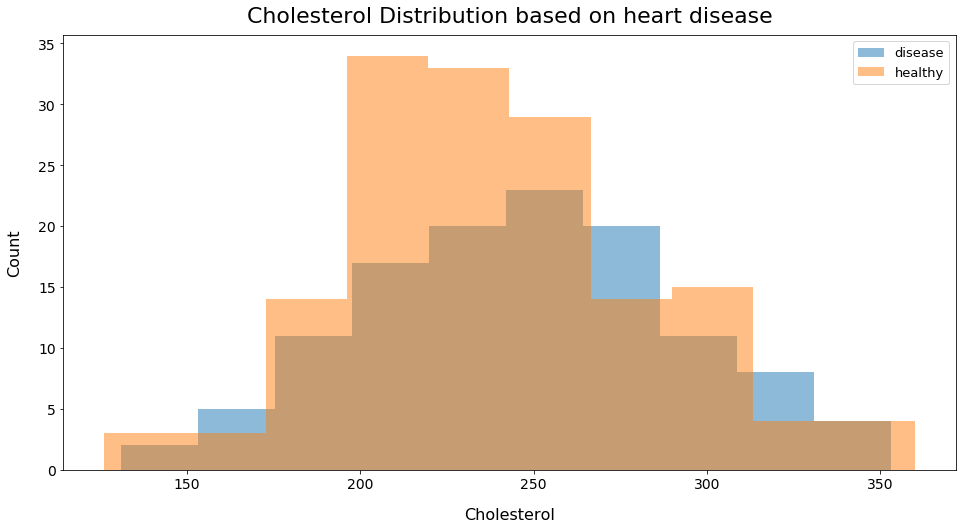

In [45]:
plt.figure(figsize=(16,8))
plt.hist(df_d['cholesterol'], alpha=0.5, label='disease')
plt.hist(df_nd['cholesterol'], alpha=0.5, label='healthy')
plt.title('Cholesterol Distribution based on heart disease', fontsize=22, y=1.015)
plt.xlabel('Cholesterol', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(loc='upper right', prop={'size':13})
plt.show()

We can see that there are no significant differences between the one with heart disease and the one with healthy heart as they are both have even distributions 

In [48]:
sugar_distribution = df2.groupby(["blood_sugar", "result"]).size().reset_index()

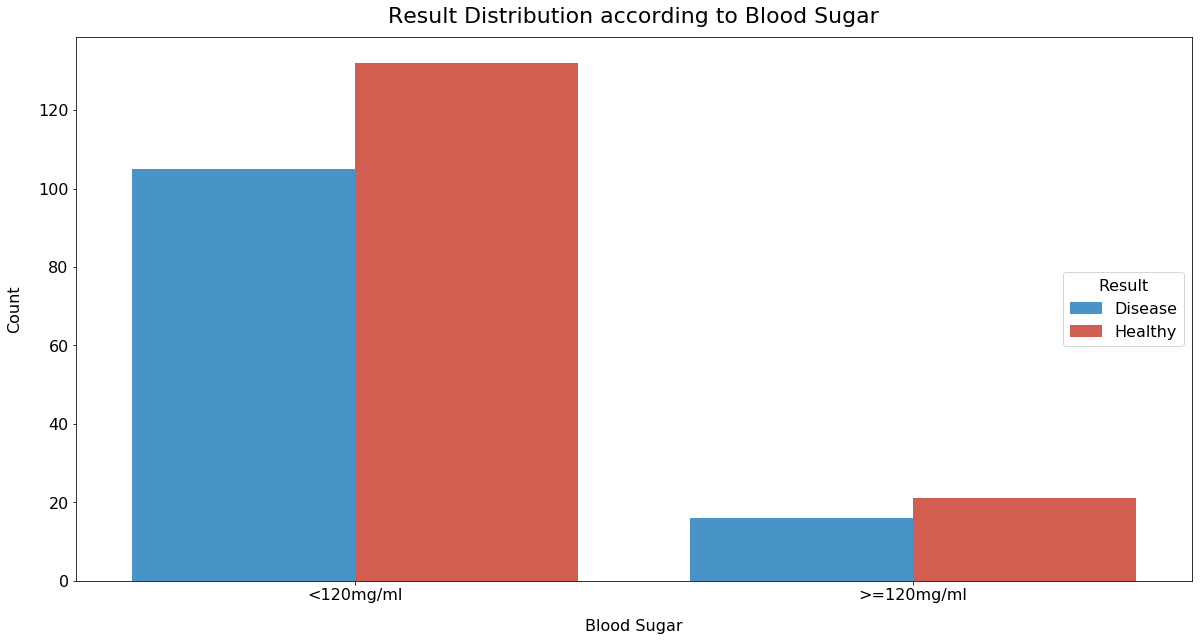

In [49]:
plt.figure(figsize=(20,10))
my_palette = {0:'#3498db', 1:'#e74c3c'}
ax = sb.barplot(x='blood_sugar', y=0, hue='result', palette=my_palette, data=sugar_distribution)
plt.title('Result Distribution according to Blood Sugar', fontsize=22, y=1.015)
plt.xlabel('Blood Sugar', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
leg = ax.legend(loc='center right', bbox_to_anchor=(1, 0.5),  prop={'size':16})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

Blood sugar plot also indicated that there is no special trend, the same as cholesterol distribution plot 

### 4. What is the trend of the cardiological test such as ECG, Fluoroscopy and Thallium?### 
After knowing the symptoms, we will try to analyze the trend in the cardiological tests results

In [50]:
ecg_distribution = df2.groupby(["restecg", "result"]).size().reset_index()

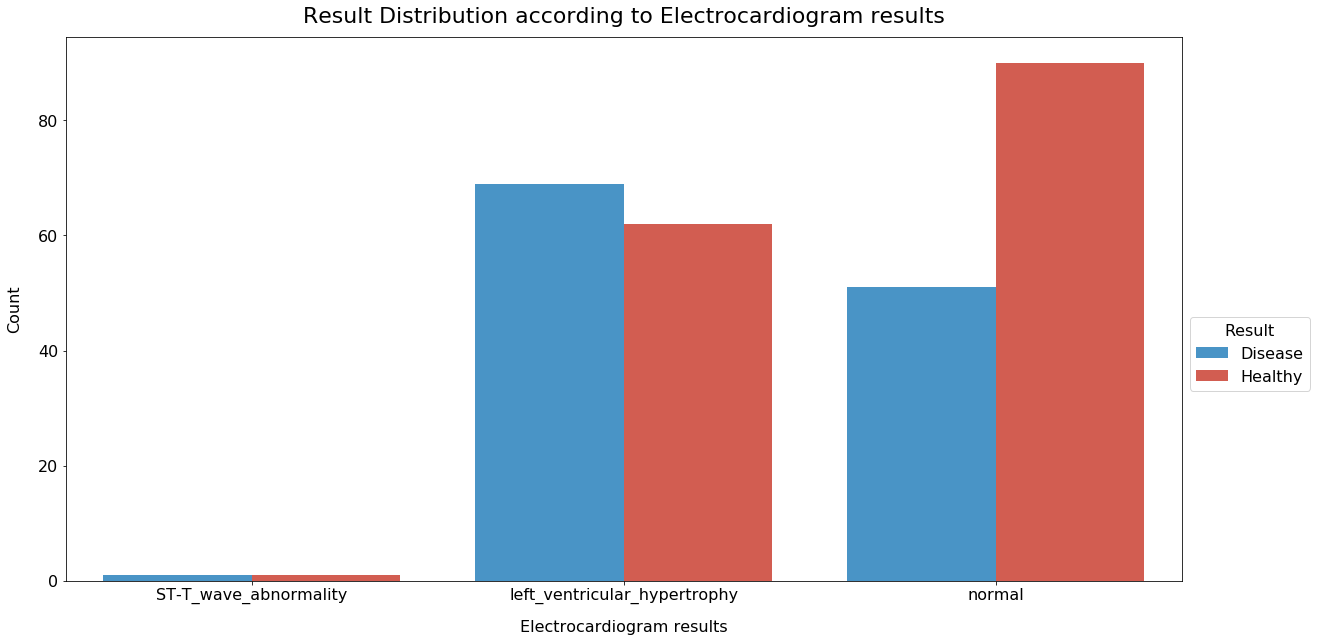

In [73]:
plt.figure(figsize=(20,10))
my_palette = {0:'#3498db', 1:'#e74c3c'}
ax = sb.barplot(x='restecg', y=0, hue='result', palette=my_palette, data=ecg_distribution)
plt.title('Result Distribution according to Electrocardiogram results', fontsize=22, y=1.015)
plt.xlabel('Electrocardiogram results', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
leg = ax.legend(loc='left', bbox_to_anchor=(1, 0.5), prop={'size':16})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

So according to this graph of ecg results, the main findings from this are a lot of the patient with heart disease found out that they are suffering from left venticular hypertrophy (enlargement and thickening of the heart pumping chamber wall). 

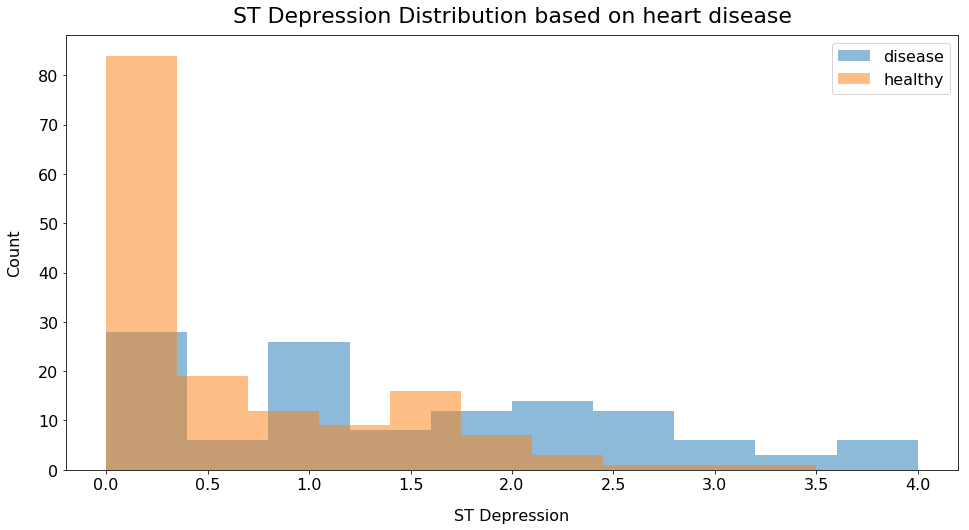

In [54]:
plt.figure(figsize=(16,8))
plt.hist(df_d['st_depression'], alpha=0.5, label='disease')
plt.hist(df_nd['st_depression'], alpha=0.5, label='healthy')
plt.title('ST Depression Distribution based on heart disease', fontsize=22, y=1.015)
plt.xlabel('ST Depression', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.legend(loc='upper right', prop={'size':16})
plt.show()

[ST depression](https://litfl.com/st-segment-ecg-library/) refers to the fluctuation of ST segments in the electrocardiogram where the higher the ST depressions (mV) there is higher chance that the supply of blood to hearts is lesser, thus, higher chance of heart failing. This explanation is in line with the graph where people with heart disease have higher ST depression.

In [55]:
st_distribution = df2.groupby(["st_slope", "result"]).size().reset_index()

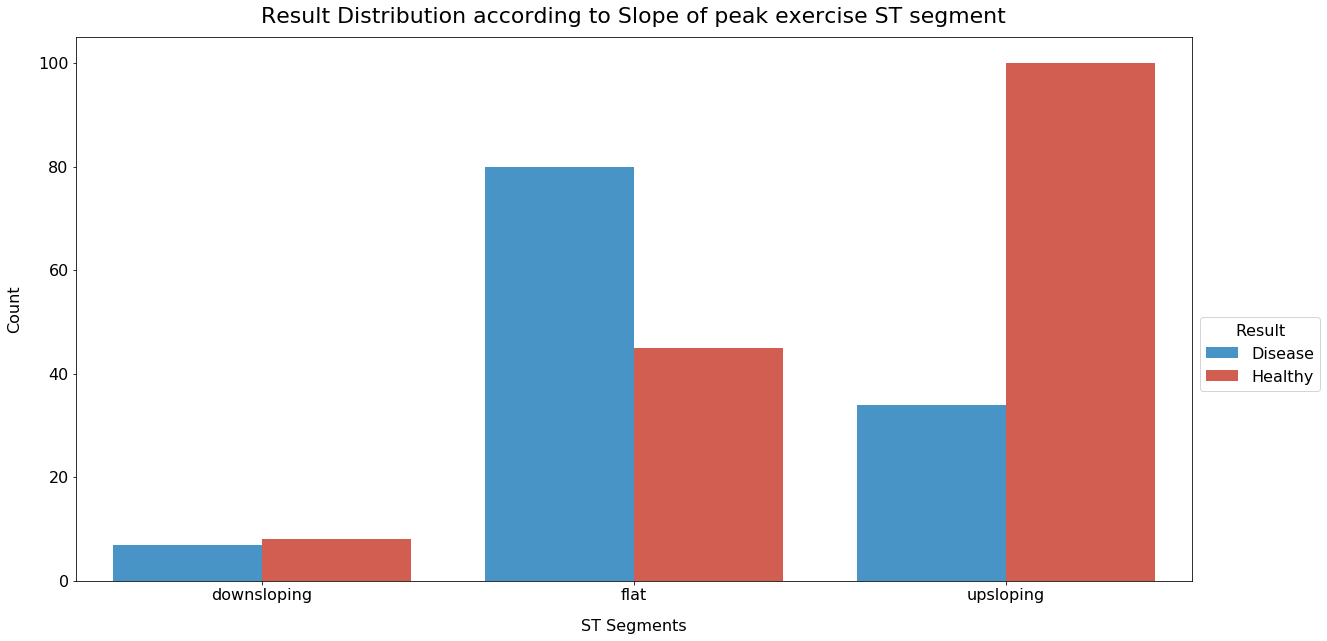

In [56]:
plt.figure(figsize=(20,10))
my_palette = {0:'#3498db', 1:'#e74c3c'}
ax = sb.barplot(x='st_slope', y=0, hue='result', palette=my_palette, data=st_distribution)
plt.title('Result Distribution according to Slope of peak exercise ST segment', fontsize=22, y=1.015)
plt.xlabel('ST Segments', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
leg = ax.legend(loc='left', bbox_to_anchor=(1, 0.5), prop={'size':16})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

In this graph, we measure the slope of the peak during ST segments. According to this [source](https://litfl.com/st-segment-ecg-library/), the flat or downsloping leads to myocardial ischaemia at certain threshold which is in line with this finding of the graph (upsloping only considered dangerous at certain threshold and combined with other tests) 

In [57]:
vessel_distribution = df2.groupby(["major_vessels", "result"]).size().reset_index()

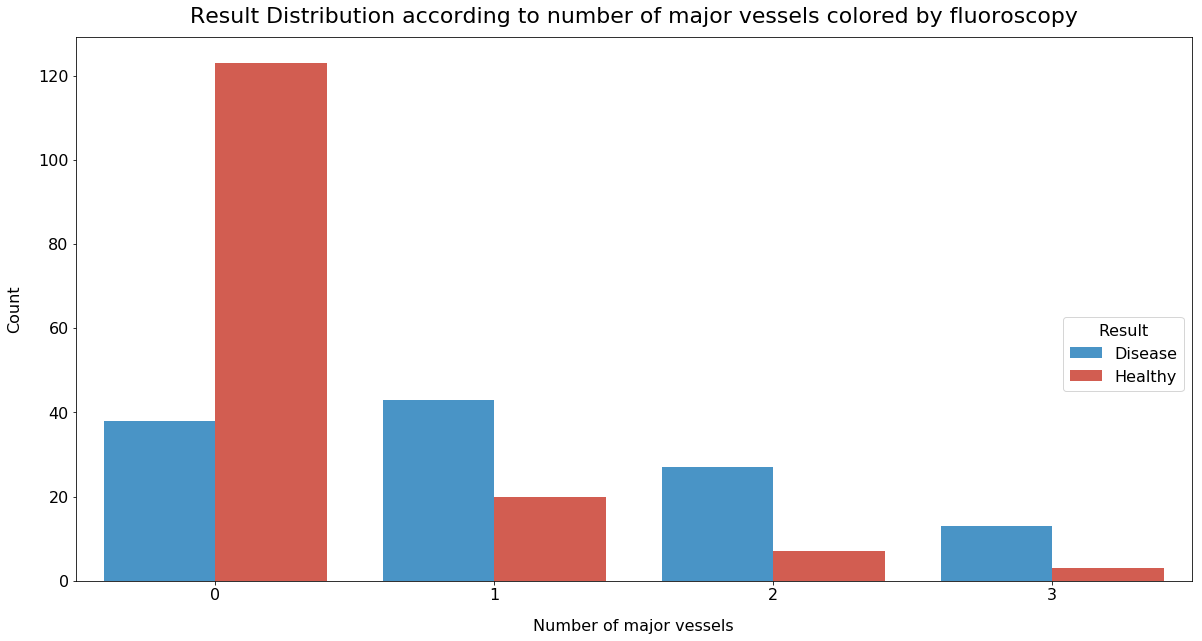

In [74]:
plt.figure(figsize=(20,10))
my_palette = {0:'#3498db', 1:'#e74c3c'}
ax = sb.barplot(x='major_vessels', y=0, hue='result', palette=my_palette, data=vessel_distribution)
plt.title('Result Distribution according to number of major vessels colored by fluoroscopy', fontsize=22, y=1.015)
plt.xlabel('Number of major vessels', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
leg = ax.legend(loc='left', bbox_to_anchor=(1, 0.5), prop={'size':16})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

[Fluoroscopy](https://www.fda.gov/radiation-emitting-products/medical-x-ray-imaging/fluoroscopy) is a test which used to examine the hearts by using the material itself in order to provide continuous imaging of the examined area. The more vessels are colored by the fluoroscopy, the more troubled major vessels in the hearts of the patient. 

In [59]:
thallium_distribution = df2.groupby(["thallium", "result"]).size().reset_index()

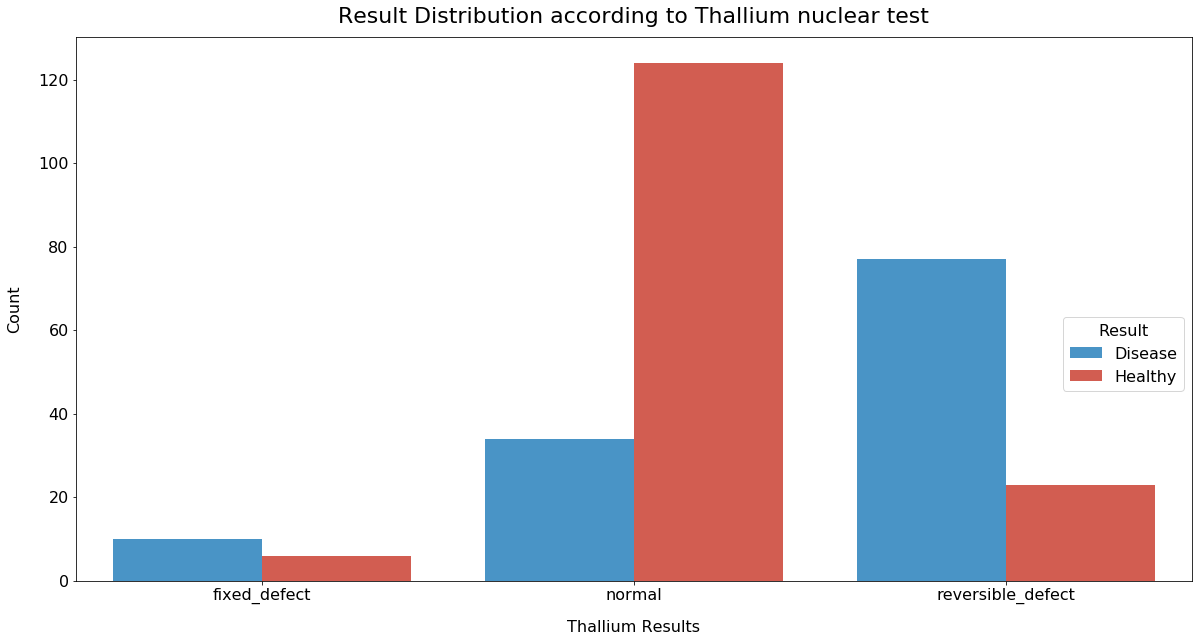

In [60]:
plt.figure(figsize=(20,10))
my_palette = {0:'#3498db', 1:'#e74c3c'}
ax = sb.barplot(x='thallium', y=0, hue='result', palette=my_palette, data=thallium_distribution)
plt.title('Result Distribution according to Thallium nuclear test', fontsize=22, y=1.015)
plt.xlabel('Thallium Results', fontsize=16, labelpad=16)
plt.ylabel('Count', fontsize=16, labelpad=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
leg = ax.legend(loc='left', bbox_to_anchor=(1, 0.5), prop={'size':16})
new_title = 'Result'
leg.set_title(new_title, prop={'size':16})
new_labels = ["Disease", "Healthy"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax = plt.gca()

[Thallium nuclear test](https://www.jaocr.org/articles/review-of-spect-myocardial-perfusion-imaging) is the the type of test which patient is injected with thallium radioactive dye and the dye is picked up with the sensor and translated into images. There are three types of result: fixed defect (a type of perfusion defect which can be detected during stress and rest) , normal and reversible defect(a type of perfusion defect which improves at rest). a lot of patient is admitted with heart disease have reversible defect 

## 4. Modeling ## 
### 5. Out of 14 predicting features, what are the important features in predicting whether the patient have heart disease or not? (by using machine learning) ?### 

For the last question, we will use machine learning algorithm in order to know which features will have the most weight in predicting whether the patient have heart disease or not

In [61]:
df3 = pd.get_dummies(df2, drop_first=True)

In [62]:
df3.head()

,age,blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,result,gender_male,chest_pain_atypical_angina,chest_pain_non_anginal_pain,chest_pain_typical_angina,blood_sugar_>=120mg/ml,restecg_left_ventricular_hypertrophy,restecg_normal,exang_yes,st_slope_flat,st_slope_upsloping,thallium_normal,thallium_reversible_defect
0,63,145,233,150,2.3,0,1,1,0,0,1,1,1,0,0,0,0,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,0,1,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,1,0,0,0,1,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,0,1,0,0,1,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,0,1,1,0,1,1,0


In [63]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3.drop('result', 1), 
                                                    df3['result'], 
                                                    test_size = 0.3, 
                                                    random_state = 56, shuffle=True)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 191 samples.
Testing set has 83 samples.


In [64]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 

    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')

In [65]:
clf_a = LogisticRegression(random_state=56)
clf_b = RandomForestClassifier(random_state=56)
clf_c = SGDClassifier(random_state=56)


model_a = clf_a.fit(X_train, y_train)
model_b = clf_b.fit(X_train, y_train)
model_c = clf_c.fit(X_train, y_train)

## 5. Evaluation ## 
After training our model, we will predict and evaluate the metric in predicting the results

In [66]:
rf_preds = model_a.predict(X_test)
print_metrics(y_test, rf_preds, 'logistic regression')

rf_preds = model_b.predict(X_test)
print_metrics(y_test, rf_preds, 'random forest')

rf_preds = model_c.predict(X_test)
print_metrics(y_test, rf_preds, 'SGD classifier')

Accuracy score for logistic regression : 0.8554216867469879
Precision score logistic regression : 0.8222222222222222
Recall score logistic regression : 0.9024390243902439
F1 score logistic regression : 0.8604651162790697



Accuracy score for random forest : 0.7951807228915663
Precision score random forest : 0.8
Recall score random forest : 0.7804878048780488
F1 score random forest : 0.7901234567901235



Accuracy score for SGD classifier : 0.4939759036144578
Precision score SGD classifier : 0.4939759036144578
Recall score SGD classifier : 1.0
F1 score SGD classifier : 0.6612903225806451





We can see that logistic regresssion is the most suitable in predicting the result since the end result is binary and the random forest as the second most predictive 

In [67]:
parameters = {'C':[0.01,0.1,1,10,100,1000], 'solver':['lbfgs', 'liblinear']}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_a, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_a.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8554
F-score on testing data: 0.8371

Optimized Model
------
Final accuracy score on the testing data: 0.8434
Final F-score on the testing data: 0.8373


We can see that the unoptimized version is better than optimized  in accuracy; however, for the Fscore, the optimized version is better 

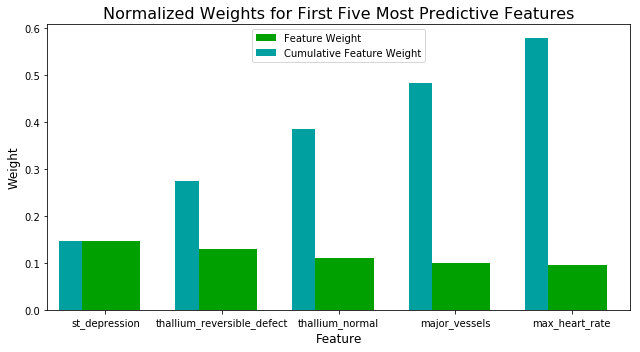

In [68]:
model = RandomForestClassifier(random_state=56).fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

By using the random forest feature importances, we can get the most predictive top 5 features that can affect the end results of predicting whether patients have heart disease or not. The end results is that ST depression, thallium nuclear test results especially whether normal or reversible defect results, number of heart major vessels and the max heart rate of the patients. 

## 6. Deployment ## 
So after all of the data preparation and analysis, we will conclude and take the findings which can be applied in real world

**1. Does age and gender of the patients have certain trends in determining whether the patient have heart disease or not?** 

Yes, according to the findings and the graphs, as a person become older, the possibility of having heart disease is higher especially during 50s while the most common gender in having the heart disease is male. By combining both age and gender features, we can know that male patients have wider distribution in the range of 30s-80s while female patients range in 50s-60s.

**2. What is the relationship between blood pressure and heart rate in having heart disease?** 

According to the max heart rate of the patients, the healthy patient seems to have higher max heart rate compared to the sick patient while the blood pressure for sick patients seems to have higher blood pressure compared to the healthy patient. This fact is also reinforced by the combined graph where healthy patient is located at the place with higher max heart rate and lower blood pressure compared to the sick patient. 

**3. Do we know the symptom of the heart attacks such as chest pain caused by heart disease?** 

From the chest pain graph, we can determine that most of the sick patient with heart disease have asymptomatic or silent angina which did not show any symptoms during its attack. Other remaining features indicated that exercising can also induce the chest pain for the sick patients. If the sick patient is examined with electrocardiogram or nuclear test, we can find out that their heartbeat, heart scanning or heart examinations have abnormal results which related with reducing the amount of blood supplied to heart. 

**4. What is the trend of the cardiological test such as ECG, Fluoroscopy and Thallium?** 

ECG (Electrocardiogram) test results is represented by ST depression result where higher number of the fluctuations in the ST segments, indicated that there is higher chance of contracting heart disease. The flat slope of ST depression is the most common results for the patient with heart disease. Fluoroscopy test result is indicated by major vessels column which stated that the higher the number of major vessels is colored by fluoroscopy, the higher chance that the patient have heart disease. For Thallium test, we found out that the result of the reversible defect is the most common defect that patient with heart disease have.    

**5. Out of 14 predicting features, what are the important features in predicting whether the patient have heart disease or not? (by using machine learning)**

By using machine learning algorithm, we can predict whether a patient have heart disease or not, given their data. After training and evaluating the results, with logistic regression we can get F-score of 86%. We also tried to predict the most influential features that determine whether patient have heart disease or not by using random forest feature importance which F-score is 79%. With feature importance, we find out top 5 features: 

1. ST depression 
2. Thallium test results (reversible defect) 
3. Thallium test results (normal) 
4. Major vessels of heart
5. Maximum Heart rate 

all of these features which deemed as important by features importance, seemed to have some similarities with the previous question answers such as that most of the factors can only be determined by thorough tests and cannot be determined by appeared symptoms.

## Conclusion:##
1. The most common trait of having heart disease seemed attach to older male with high blood pressure and lower maximum heart rate. Exercise might also induce chest pain or discomfort. 
2. Chest pain or discomfort might not be an important predictor in determining heart disease or not since the most common chest pain type is the asymptomatic or the silent chest pain with no chest pain or discomfort shown. 
3. The most important predictor in predicting the heart disease or not result is the through tests such as ECG, Fluoroscopy and Thallium test which is why it is recommended to get our heart examined by cardiologist through these tests so that we can prevent the worst from happening 